
# EE5180 : Assignment 1   
<h4><b>Tarang Narendra Mendhe  : EE20B080</b></h4>


In [2]:
#importing imp files
import numpy as np
import matplotlib.pyplot as plt

<b>Q1.

In [4]:
#generating DataSet D : {x,y}
N=300
x=np.random.uniform(low=1,high=5,size=N)   #generating x uniformly between[1,5]
y=2.5*x + 3                #actual y corresponding to x ()
DataSet=np.c_[x,y]
print(DataSet)

[[ 1.41730153  6.54325383]
 [ 2.38124539  8.95311348]
 [ 3.56920624 11.92301561]
 [ 4.49041015 14.22602538]
 [ 3.12154497 10.80386243]
 [ 3.62197032 12.05492579]
 [ 3.80452515 12.51131287]
 [ 2.4729705   9.18242624]
 [ 2.49758829  9.24397072]
 [ 1.75991519  7.39978799]
 [ 2.5967837   9.49195926]
 [ 1.11156504  5.77891261]
 [ 1.21278292  6.03195731]
 [ 1.68894889  7.22237223]
 [ 2.51123243  9.27808107]
 [ 3.40888758 11.52221894]
 [ 4.1511879  13.37796974]
 [ 3.46211271 11.65528177]
 [ 2.7993567   9.99839176]
 [ 3.30464565 11.26161414]
 [ 4.33817253 13.84543132]
 [ 1.2811883   6.20297075]
 [ 3.99036464 12.97591161]
 [ 2.19164322  8.47910806]
 [ 1.79499104  7.48747759]
 [ 3.52271871 11.80679678]
 [ 1.68742075  7.21855188]
 [ 1.91993567  7.79983919]
 [ 3.57268945 11.93172363]
 [ 4.94237558 15.35593896]
 [ 1.29228883  6.23072208]
 [ 2.02206838  8.05517095]
 [ 4.98077105 15.45192763]
 [ 1.68907139  7.22267847]
 [ 2.53080177  9.32700442]
 [ 3.50749948 11.76874871]
 [ 4.61673451 14.54183629]
 

<b>Q2.

In [5]:
#y(x,theta,theta_0)
def y_fn(theta,theta_0,x):
    return theta*x +theta_0

#Total Loss function
def Loss_fn(theta,theta_0,x,y):
    N=len(x)
    Loss_fn=0
    for i in range(N):
        Loss_fn+=(( y_fn(theta,theta_0,x)[i] -y[i])**2)/(2*N)
    return Loss_fn

#Loss with theta=2, theta_0=2
print(Loss_fn(2,2,x,y))

3.279774826873194


<b>Q3.

Gradients: <br><br>
$\frac{\partial L(\theta,\theta_0)}{\partial \theta}=\frac{1}{N}\sum_{i=1}^{N} (\theta x_i+ \theta_0-\tilde{y_i})x_i $     ,     $\frac{\partial L(\theta,\theta_0)}{\partial \theta_0}=\frac{1}{N}\sum_{i=1}^{N} (\theta x_i+ \theta_0-\tilde{y_i}) $ <br>
$\frac{\partial L_i(\theta,\theta_0)}{\partial \theta}=2(\theta x_i+ \theta_0-\tilde{y_i})x_i $  ,  $  \frac{\partial L_i(\theta,\theta_0)}{\partial \theta}=2(\theta x_i+ \theta_0-\tilde{y_i}) $ 

In [6]:
#gradient for dataset D

#gradient Loss function (i)
def grad_L_i(theta,theta_0,xi,yi):
    grad_L_i_theta=2*(y_fn(theta,theta_0,xi) -yi)*xi
    grad_L_i_theta_0=2*(y_fn(theta,theta_0,xi) -yi)
    return np.array([grad_L_i_theta,grad_L_i_theta_0])

#gradient total loss function
def grad_L(theta,theta_0,x,y):
    N=len(x)
    grad_L_theta=0
    grad_L_theta_0=0
    for i in range(N):
        grad_L_theta+=(y_fn(theta,theta_0,x)[i] -y[i])*x[i]/N
        grad_L_theta_0+=(y_fn(theta,theta_0,x)[i] -y[i])/N
    return np.array([grad_L_theta,grad_L_theta_0]) 

#finding grad for theta=1, theta_0=1
print (grad_L(1,1,x,y))
print(grad_L_i(1,1,x[3],y[3]))

[-21.34306876  -6.50533593]
[-78.45299058 -17.47123045]


<b>Q4.</b>

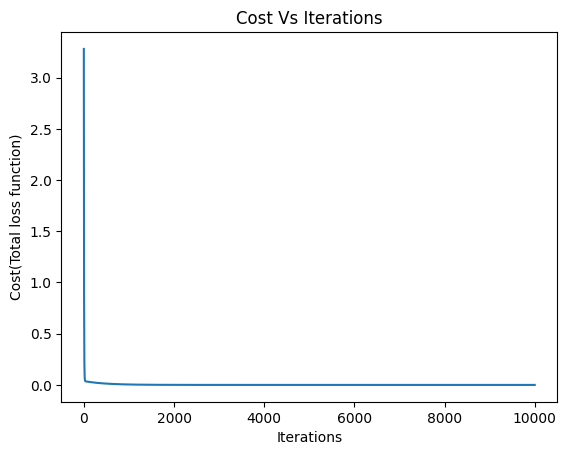

The optimal(minimum) value of theta=2.500004339369386 ,theta_0=2.999985386586324


In [11]:
#Gradient Descent algorithm
T=10000
theta=2     #taking initial guess as theta=2  , theta_0 =2
theta_0=2
step_size=0.01
Loss_array=np.zeros(T+1) # T+1 for including value of loss fn at initial guess
Loss_array[0]=Loss_fn(theta,theta_0,x,y)
for k in range(T):
    theta=theta-step_size*grad_L(theta,theta_0,x,y)[0]
    theta_0=theta_0-step_size*grad_L(theta,theta_0,x,y)[1]
    Loss_array[k+1]=Loss_fn(theta,theta_0,x,y)

plt.plot(np.array(range(10001)),Loss_array)
plt.title("Cost Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost(Total loss function)")
plt.show()
print(f"The optimal(minimum) value of theta={theta} ,theta_0={theta_0}")

In [12]:
#value of loss function at theta and theta_0 after 10000 iterations
print(Loss_array[10000])

1.2570671370637096e-11
